In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
path = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/statement/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [3]:
file_list_time=[file_list[i].split('-')[0][-4:]+file_list[i].split('-')[1]+file_list[i].split('-')[2][:2] for i in range(len(file_list))]

In [4]:
repeat_sentence='The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Monetary Policy Principles and Practice Review of Monetary Policy Strategy, Tools, and Communications Banking Applications & Legal Developments Reserve Bank Payment Services & Data Financial Market Utilities & Infrastructures Exchange Rates and International Data Micro Data Reference Manual (MDRM) Money Stock and Reserve Balances' 

In [5]:
statement_text=dict()
for i in range(len(file_list)):
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        if ('Voting for the FOMC monetary policy action were' in line):
          break
        contents.append(line.strip())
  text = ' '.join(contents)
  text=text.replace('Â\xa0',' ')
  text=text.replace(repeat_sentence,"")
  if len(text.split(' '))>100:
    statement_text[file_list_time[i]]='statement '+text
  else:
    print(i,len(text.split(' ')),text)

3 99 Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. The action is expected to be associated with a small increase in short-term money market interest rates. The decision was taken to move toward a less accommodative stance in monetary policy in order to sustain and enhance the economic expansion. Chairman Greenspan decided to announce this action immediately so as to avoid any misunderstanding of the Committee's purposes, given the fact that this is the first firming of reserve market conditions by the Committee since early 1989.
15 36 Chairman Alan Greenspan announced today that the Federal Reserve will increase slightly the degree of pressure on reserve positions. This action is expected to be associated with a small increase in short-term money market interest rates.
41 71 Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to decrease slightly

In [6]:
path = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/speech/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]


In [7]:
file_list_time_speech=[file_list[i].split('-')[0][-4:]+file_list[i].split('-')[1]+file_list[i].split('-')[2][:2] for i in range(len(file_list))]

In [8]:
speech_dicter={}
path_save = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/text_summarization/speech/"
for i in range(len(file_list)):
  #print(i,file_list[i])
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    #print(line)
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        contents.append(line.strip().replace('Â',' '))
  
  text = ' '.join(contents)
  text=text.replace('Â\xa0',' ')
  text=text.replace(repeat_sentence,"")
  #print(text)
  if (len(text.split(' '))<100):
    print('!',i,text)
  else:
    speech_dicter[file_list_time_speech[i]]='speech '+text

! 84 Reflections on the Capital Goods Overhang
! 104 
! 110 Corporate governance, the subject of our conference, has evolved over the past century to more effectively promote the allocation of the nation s savings to its most productive uses.  And, generally speaking, the resulting structure of business incentives, reporting, and accountability has served us well.  We could not have achieved our current level of national productivity if corporate governance had been deeply flawed.
! 154 
! 159 
! 169 
! 188 
! 205 
! 254 
! 321 Asset Prices and Monetary Policy
! 333 Thank you, Tom.  On behalf of the Federal Reserve, I am pleased to be with you all as we unveil the newly designed $20 note.
! 370 I am pleased to appear once again before the Independent Community Bankers of America.  There can be little doubt that the business environment in which you have operated over the past year has been challenging.
! 406 
! 469 
! 519 Thank you. I am pleased to have the opportunity to help launch 

In [9]:
import pandas as pd
raw_data_speech=pd.DataFrame({'date':speech_dicter.keys(),'text':speech_dicter.values(),'type':['speech' for i in range(len(speech_dicter.values()))]})
raw_data_speech.sort_values(by='date',inplace=True)
raw_data_speech

,date,text,type
1083,19960613,speech Remarks by Chairman Alan Greenspan Bank...,speech
488,19960618,"speech Remarks by Governor Edward W. Kelley, J...",speech
15,19960908,speech Monetary Policy Objectives and Strategy...,speech
1232,19960919,speech Remarks by Chairman Alan Greenspan Regu...,speech
1236,19961002,speech Remarks by Governor Lawrence B. Lindsey...,speech
...,...,...,...
810,20220221,speech At the American Bankers Association Co...,speech
700,20220224,"speech At the Economic Forecast Project, Univ...",speech
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech


In [10]:
raw_data_statement=pd.DataFrame({'date':statement_text.keys(),'text':statement_text.values(),'type':['statement' for i in range(len(statement_text.values()))]})
raw_data_statement.sort_values(by='date',inplace=True)
raw_data_statement

,date,text,type
186,19940517,statement The Federal Reserve today announced ...,statement
146,19940816,statement The Federal Reserve announced today ...,statement
177,19941115,statement The Federal Reserve Board today appr...,statement
153,19950201,statement The Federal Reserve Board today appr...,statement
25,19960131,statement The Federal Reserve today announced ...,statement
...,...,...,...
149,20210922,statement For release at 2:00 p.m. EDT The Fe...,statement
88,20211103,statement For release at 2:00 p.m. EDT The Fe...,statement
33,20211215,statement For release at 2:00 p.m. EST The Fe...,statement
66,20220126,statement For release at 2:00 p.m. EST Indica...,statement


In [11]:
raw_data=pd.concat([raw_data_speech,raw_data_statement],axis=0)
raw_data.sort_values(by='date',inplace=True)
raw_data

,date,text,type
186,19940517,statement The Federal Reserve today announced ...,statement
146,19940816,statement The Federal Reserve announced today ...,statement
177,19941115,statement The Federal Reserve Board today appr...,statement
153,19950201,statement The Federal Reserve Board today appr...,statement
25,19960131,statement The Federal Reserve today announced ...,statement
...,...,...,...
700,20220224,"speech At the Economic Forecast Project, Univ...",speech
188,20220316,statement For release at 2:00 p.m. EDT Indica...,statement
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech


In [12]:
interest_data=pd.read_csv('/content/gdrive/MyDrive/JPM/Baseline_Model/Interest Rate Spread/US.csv')
def get_date(data):
  data=data.split('-')
  return data[0]+data[1]+data[2]
interest_data.Date=interest_data.Date.apply(get_date)
interest_data.index=interest_data['Date']
interest_data['range']=list(range(len(interest_data)))


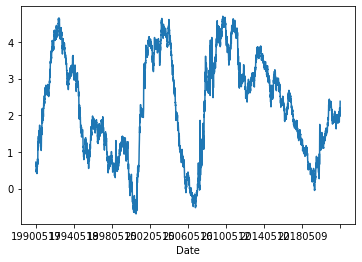

In [13]:
interest_data['Spread']=interest_data['TRESY30y']-interest_data['TRESY3mo']
interest_data.Spread.plot()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
raw_data=pd.concat([raw_data_statement,raw_data_speech],axis=0)
raw_data.sort_values(by='date',inplace=True)
eng_stopwords = stopwords.words('english')
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

raw_data['clean_review'] = raw_data.text.apply(clean_text)

In [16]:
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_data[interest_data['Date']<=(raw_data.iloc[i,0])]['range'].tail(1))
    #print(index)
    raw_data.iloc[i,-1]=(interest_data.iloc[index+5,-1]-interest_data.iloc[index,-1])/(1+interest_data.iloc[index,-1])
  except:
    pass
new_raw=raw_data.dropna()
new_raw

,date,text,type,clean_review,change
186,19940517,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced two ...,0.030227
146,19940816,statement The Federal Reserve announced today ...,statement,statement federal reserve announced today foll...,0.054795
177,19941115,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,0.028409
153,19950201,statement The Federal Reserve Board today appr...,statement,statement federal reserve board today approved...,0.014925
25,19960131,statement The Federal Reserve today announced ...,statement,statement federal reserve today announced foll...,0.116162
...,...,...,...,...,...
700,20220224,"speech At the Economic Forecast Project, Univ...",speech,speech economic forecast project university ca...,-0.033784
188,20220316,statement For release at 2:00 p.m. EDT Indica...,statement,statement release p edt indicators economic ac...,0.000000
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech,speech fed listens helping youth thrive discus...,0.016667
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech,speech chair pro tempore jerome h powell polic...,-0.009967


In [ ]:
train=new_raw.head(int(0.75*len(new_raw)))
test=new_raw.tail(int(0.25*len(new_raw)))
train_label=np.array(train.change).reshape(-1,1)
test_label=np.array(test.change).reshape(-1,1)
from sklearn.ensemble import RandomForestRegressor
best_IC=-1
alpha=0
for features in range(1000,3000,100):
  print('############################')
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0.01
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for maxdepth in range(1,4):
    regressor =RandomForestRegressor(max_depth=maxdepth, n_estimators=100,random_state=0)
    regressor.fit(train_vsm_tfidf, train_label)
    train_predict=regressor.predict(train_vsm_tfidf)
    test_predict=regressor.predict(test_vsm_tfidf)
    print('train_err',round(mean_squared_error(train_predict, train_label),4),\
          'test_err',round(mean_squared_error(test_predict, test_label),4),'data_variance',round(test_label.var(),4))
    print('train_IC :',round(stats.spearmanr(train_predict,[i[0] for i in train_label])[0],4),
          'P_value :',round(stats.spearmanr(train_predict,[i[0] for i in train_label])[1],4))
    print('test_IC :',round(stats.spearmanr(test_predict,[i[0] for i in test_label])[0],4),
          'P_value :',round(stats.spearmanr(test_predict,[i[0] for i in test_label])[1],4),'alpha ',100)
    if stats.spearmanr(test_predict,[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr(test_predict,[i[0] for i in test_label])[0]
      best_alpha=100
#print(round(best_IC,4),features,best_alpha)
  print('###################################')

############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1179 P_value : 0.0001
test_IC : 0.0102 P_value : 0.8431 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0045 test_err 0.0032 data_variance 0.003
train_IC : 0.1383 P_value : 0.0
test_IC : 0.0637 P_value : 0.2168 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0033 data_variance 0.003
train_IC : 0.1624 P_value : 0.0
test_IC : 0.1214 P_value : 0.0182 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.0885 P_value : 0.0029
test_IC : 0.0384 P_value : 0.4566 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0032 data_variance 0.003
train_IC : 0.1182 P_value : 0.0001
test_IC : 0.0846 P_value : 0.1004 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0032 data_variance 0.003
train_IC : 0.1497 P_value : 0.0
test_IC : 0.1349 P_value : 0.0087 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.0963 P_value : 0.0012
test_IC : 0.0477 P_value : 0.3551 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0031 data_variance 0.003
train_IC : 0.1079 P_value : 0.0003
test_IC : 0.0792 P_value : 0.1241 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0032 data_variance 0.003
train_IC : 0.1489 P_value : 0.0
test_IC : 0.1342 P_value : 0.009 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1021 P_value : 0.0006
test_IC : 0.0127 P_value : 0.8052 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0032 data_variance 0.003
train_IC : 0.1486 P_value : 0.0
test_IC : 0.0444 P_value : 0.3889 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0033 data_variance 0.003
train_IC : 0.1447 P_value : 0.0
test_IC : 0.0759 P_value : 0.1407 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.0993 P_value : 0.0008
test_IC : -0.0101 P_value : 0.8442 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0032 data_variance 0.003
train_IC : 0.1389 P_value : 0.0
test_IC : 0.019 P_value : 0.7127 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0033 data_variance 0.003
train_IC : 0.1553 P_value : 0.0
test_IC : 0.0713 P_value : 0.1668 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1095 P_value : 0.0002
test_IC : 0.0261 P_value : 0.6124 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0032 data_variance 0.003
train_IC : 0.1399 P_value : 0.0
test_IC : 0.0804 P_value : 0.1187 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0032 data_variance 0.003
train_IC : 0.1417 P_value : 0.0
test_IC : 0.0778 P_value : 0.131 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.105 P_value : 0.0004
test_IC : 0.0255 P_value : 0.6214 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0031 data_variance 0.003
train_IC : 0.1406 P_value : 0.0
test_IC : 0.053 P_value : 0.3043 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0032 data_variance 0.003
train_IC : 0.1478 P_value : 0.0
test_IC : 0.0668 P_value : 0.1951 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1036 P_value : 0.0005
test_IC : -0.0112 P_value : 0.8277 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0031 data_variance 0.003
train_IC : 0.1272 P_value : 0.0
test_IC : 0.039 P_value : 0.45 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0032 data_variance 0.003
train_IC : 0.1339 P_value : 0.0
test_IC : 0.0152 P_value : 0.7683 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0047 test_err 0.0031 data_variance 0.003
train_IC : 0.1134 P_value : 0.0001
test_IC : -0.0062 P_value : 0.9037 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0032 data_variance 0.003
train_IC : 0.1614 P_value : 0.0
test_IC : -0.0053 P_value : 0.9179 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0032 data_variance 0.003
train_IC : 0.1463 P_value : 0.0
test_IC : -0.0022 P_value : 0.9665 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1321 P_value : 0.0
test_IC : -0.0375 P_value : 0.4673 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0031 data_variance 0.003
train_IC : 0.1495 P_value : 0.0
test_IC : 0.0067 P_value : 0.8974 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0042 test_err 0.0031 data_variance 0.003
train_IC : 0.1648 P_value : 0.0
test_IC : 0.0197 P_value : 0.7031 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1215 P_value : 0.0
test_IC : 0.0026 P_value : 0.9601 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0031 data_variance 0.003
train_IC : 0.1518 P_value : 0.0
test_IC : 0.0597 P_value : 0.2473 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.2046 P_value : 0.0
test_IC : 0.077 P_value : 0.1353 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1256 P_value : 0.0
test_IC : -0.0109 P_value : 0.832 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0044 test_err 0.0031 data_variance 0.003
train_IC : 0.1531 P_value : 0.0
test_IC : 0.0244 P_value : 0.6357 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1896 P_value : 0.0
test_IC : 0.0226 P_value : 0.6608 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.0979 P_value : 0.001
test_IC : -0.0137 P_value : 0.7899 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1293 P_value : 0.0
test_IC : 0.0054 P_value : 0.9169 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1593 P_value : 0.0
test_IC : 0.01 P_value : 0.8456 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.0939 P_value : 0.0016
test_IC : -0.0331 P_value : 0.5214 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1239 P_value : 0.0
test_IC : 0.0261 P_value : 0.6132 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1528 P_value : 0.0
test_IC : 0.0243 P_value : 0.6383 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1191 P_value : 0.0001
test_IC : 0.0276 P_value : 0.5929 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1503 P_value : 0.0
test_IC : 0.046 P_value : 0.3729 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1627 P_value : 0.0
test_IC : 0.0581 P_value : 0.2598 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1193 P_value : 0.0001
test_IC : -0.0184 P_value : 0.7215 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1362 P_value : 0.0
test_IC : 0.0519 P_value : 0.3138 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1567 P_value : 0.0
test_IC : 0.0438 P_value : 0.3955 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1194 P_value : 0.0001
test_IC : 0.0243 P_value : 0.6378 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1304 P_value : 0.0
test_IC : 0.0543 P_value : 0.2924 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1605 P_value : 0.0
test_IC : 0.0893 P_value : 0.083 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1092 P_value : 0.0002
test_IC : -0.0206 P_value : 0.6899 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1282 P_value : 0.0
test_IC : 0.0221 P_value : 0.6679 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1492 P_value : 0.0
test_IC : 0.0347 P_value : 0.5008 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.0982 P_value : 0.0009
test_IC : 0.0136 P_value : 0.7923 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1307 P_value : 0.0
test_IC : 0.0392 P_value : 0.4472 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1471 P_value : 0.0
test_IC : 0.0331 P_value : 0.5211 alpha  100
###################################
############################


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0046 test_err 0.0031 data_variance 0.003
train_IC : 0.1072 P_value : 0.0003
test_IC : 0.0206 P_value : 0.6897 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0043 test_err 0.0031 data_variance 0.003
train_IC : 0.1146 P_value : 0.0001
test_IC : 0.0151 P_value : 0.7691 alpha  100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


train_err 0.0041 test_err 0.0031 data_variance 0.003
train_IC : 0.1351 P_value : 0.0
test_IC : 0.0095 P_value : 0.8543 alpha  100
###################################
